# DFS i BFS na drzewach


In [106]:
class TreeNode:
    def __init__(self, value=0, left=None, right=None) -> None:
        self.val = value
        self.left = left
        self.right = right
    
def make_tree(lst):
    # robimy to metodą bfs
    root = TreeNode(lst[0])
    lst = lst[1:]
    q = [root]
    while q and lst:
        node = q.pop(0)
        valL = lst.pop(0)
        if valL != None:
            node.left = TreeNode(valL)
            q.append(node.left)
        valR = lst.pop(0)
        if valR != None:
            node.right = TreeNode(valR)
            q.append(node.right)

    return root

T = make_tree([5,4,3,2,None,1,6,None,8,None,None])


def dfs(t):
    if t == None:
        print("None")
        return
    dfs(t.left)
    print(t.val)
    dfs(t.right)

# dfs(T)

def bfs(t):
    q = [t]
    while q:
        qLen = len(q)
        for _ in range(qLen):
            node = q.pop(0)
            if node == None:
                print("None")
            else:
                print(node.val)
                q.append(node.left)
                q.append(node.right)
bfs(T)

5
4
3
2
None
1
6
None
8
None
None
None
None
None
None


# Kopce
- pamiętamy w tablicy
- K[1] -> root, K[2] -> lewe dziecko, K[3] prawe dziecko itd.

Dziecko i-tego elementu to 2i oraz 2i + 1
Rodzic i-tego elementu to i div 2

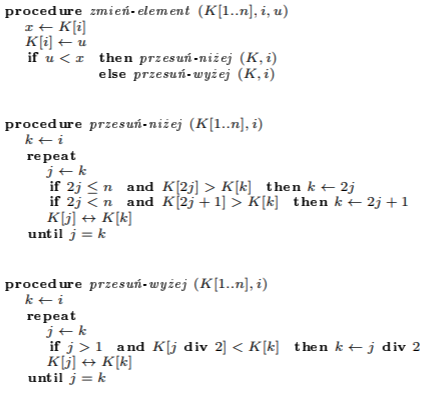

## Kopiec minimaksowy
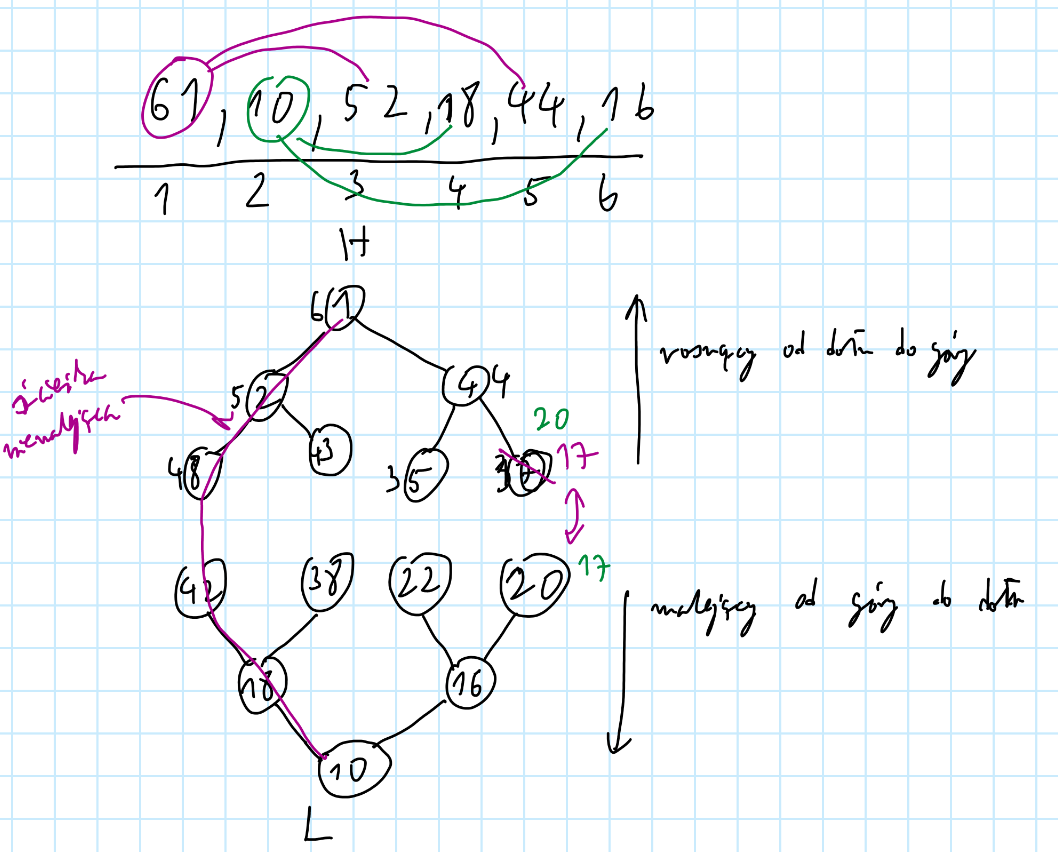

# Porządek topologiczny
- początek kazdej krawędzi występuje przed jej końcem
## Algorytm sortowania topologicznego - złozność -> O(|V| + |E|)

In [107]:
"""
    graf w postaci listy krawędzi, przechodzimy dfs, zapamiętujemy gdzie
    byliśmy, zeby nie chodzić w kółko
"""
graph = {
    1: [4, 2],
    2: [],
    3: [2],
    4: [5, 6],
    5: [],
    6: [7],
    7: []
}

def topo_sort(g):
    """
        Odwiedzamy kazdy wierzchołek, potem rekurencyjnie odwiedzamy jego sąsiadów
    """
    stack = []
    visited = {node: False for node in g}

    for n in g.keys():
        if not visited[n]:
            visit(n, stack, visited, g)
    # odwracamy bo dodajemy od końca (uzywamy append)
    return stack[::-1]

def visit(node, stack, visited, g):
    """
        odwiedzamy wierzchołek, następnie odwiedzamy nieowiedzonych sąsiadów,
        po ich odwiedzaniu dodajemy do wyniku nasz aktualny wierzchołek
    """
    visited[node] = True
    for neightbour in g[node]:
        if not visited[neightbour]:
            visit(neightbour, stack, visited, g)
    
    stack.append(node)

print(topo_sort(graph))

[3, 1, 2, 4, 6, 7, 5]


## Leksykograficzny porządek topologiczny:
#### Idea:
Zapamiętujemy wierzchołki i ich stopnie. Wierzchołki o stopniach równych 0 wrzucamy na kopiec minimalny, potem przechodzimy po ich sąsiadach i zmniejszamy ich stopnie. Powtarzamy te kroki, dopóki kopiec nie będzie pusty.
- Złożoność: O(|V| * log(|V|))

## Znajdowanie najdłuższej ścieżki w grafie
#### Idea:
Sortujemy graf topologicznie. W tablicy D trzymamy pary <rodzic, dł_najd_ścieżki>. Po przesortowanym grafie G przechodzimy i potem przechodzimy po sąsiadach danych wierzchołków, aktualizując tablicę D. Aby wypisać ścieżkę, rekurencyjnie przechodzimy po rodzicach z D.


# DFS i BFS
Przeszukiwanie grafu wgłąb i wszerz

In [108]:
graph = {
    1:[4],
    2:[3,4],
    3:[2,7],
    4:[1,2,5,6],
    5:[4,8,9],
    6:[4],
    7:[3,9],
    8:[5],
    9:[5,7]
}


# dla grafu spójnego

# rekurencyjnie
def dfs(v, visited):
    if v in visited:
        return
    visited.add(v)
    print("Recursion DFS: ", v)
    for neighbour in graph[v]:
        dfs(neighbour, visited)


# iteracyjnie
def dfs_iter(v, visited):
    stack = [v]
    while stack != []:
        current = stack.pop()
        if current not in visited:
            visited.add(current)
            print("Iteration DFS: ", current)
            for neighbour in graph[current]:
                stack.append(neighbour)



def bfs(v, visited):
    queue = [v]
    while queue != []:
        current = queue.pop(0)
        if current not in visited:
            visited.add(current)
            print("Traversal BFS: ", current)
            for neighbour in graph[current]:
                queue.append(neighbour)

dfs(1, visited=set())
print('===================')
dfs_iter(1, visited=set())
print('===================')
bfs(1, visited=set())

Recursion DFS:  1
Recursion DFS:  4
Recursion DFS:  2
Recursion DFS:  3
Recursion DFS:  7
Recursion DFS:  9
Recursion DFS:  5
Recursion DFS:  8
Recursion DFS:  6
Iteration DFS:  1
Iteration DFS:  4
Iteration DFS:  6
Iteration DFS:  5
Iteration DFS:  9
Iteration DFS:  7
Iteration DFS:  3
Iteration DFS:  2
Iteration DFS:  8
Traversal BFS:  1
Traversal BFS:  4
Traversal BFS:  2
Traversal BFS:  5
Traversal BFS:  6
Traversal BFS:  3
Traversal BFS:  8
Traversal BFS:  9
Traversal BFS:  7


# Średnica Drzewa
- najdłuzsza ściezka między dwoma wierzchołkami

idea: Obliczamy dfs największą odległość z dowolnego wierzchołka do najdalej od niego połozonego,
to jest drugi koniec średnicy. Następnie obliczamy najdalej położony wierzchołek od znalezionego, 
i to będzie drugi koniec średnicy.

In [122]:
tree = {1: [2,12],
        2: [1, 3, 5],
        3: [2,4],
        4: [3,7],
        7: [4],
        5:[2,8,6],
        8:[5],
        6:[5,10,9],
        10:[6],
        9:[6,11], 
        11:[9],
        12:[1]
        }



# znajdujemy najdalej położony wierzchołek od danego wierzchołka
def dfs(v, dist, visited):
    visited.add(v)
    max_dist = dist
    farthest_node = v
    path = [v]

    for neighbour in tree[v]:
        if neighbour not in visited:
            (far_node, far_path, far_dist) = dfs(neighbour, dist + 1, visited)
            if far_dist > max_dist:
                path = [v]
                path += far_path
                farthest_node = far_node
                max_dist = far_dist

    return (farthest_node, path, max_dist)

# szukamy najdalszego wierzchołka dla dowolnego
diameter_1, _, _ = dfs(1, 1, visited=set())
# szukamy najdalszego od znalezionego
diameter_2, diameter_path, diameter_len = dfs(diameter_1, 1, visited=set())
print("Diameter starts at:", diameter_1)
print("Diameter ends at:", diameter_2)
print("Diameter path:", diameter_path)
print("Diameter length", diameter_len)


# BFS na szukanie najdalszego wierzchołka od każdego wierzchołka na średnicy,
# który nie jest końcem średnicy i nie leży na średnicy, wykorzystamy do tego
# BFS z wielu źródeł, czyli po prostu kolejka będzie na początku = diameter_path
def bfs(diameter_path):
    visited = set()
    max_dist = 1
    max_node = -1
    max_path = []
    queue = [[node, 0, []] for node in diameter_path]

    while queue != []:
        # bfs przechodzi po kolei po odległościach,
        # czyli wystarczy po prostu z każdym obrotem bfs zwiększać dist
        current,dist,path = queue.pop(0)
        
        if dist > max_dist:
            max_dist = dist
            max_node = current
            max_path = path + [current]

        visited.add(current)
        for neighbour in tree[current]:
            if neighbour not in visited and neighbour not in diameter_path:
                queue.append([neighbour, dist + 1, path + [current]])
    
        
    
    return max_node, max_dist, max_path

max_node, max_dist, max_path = bfs(diameter_path)

print("Max Node: ", max_node)
print("Max Dist: ", max_dist)
print("Max Path", max_path)

Diameter starts at: 11
Diameter ends at: 7
Diameter path: [11, 9, 6, 5, 2, 3, 4, 7]
Diameter length 8
Max Node:  12
Max Dist:  2
Max Path [2, 1, 12]
